In [1]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf = pd.read_csv("TaxiFare.csv")

In [3]:
tf.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
tf.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
23358,05:00.0,7.3,2009-04-16 21:05:00 UTC,-73.979713,40.764475,-73.975038,40.750920,1
39889,01:09.0,7.3,2011-09-01 01:01:09 UTC,-73.996639,40.742626,-73.998759,40.720156,1
11194,16:23.0,4.1,2012-01-01 12:16:23 UTC,0.000000,0.000000,0.000000,0.000000,4
32611,23:00.0,10.5,2009-03-19 14:23:00 UTC,-74.005430,40.748252,-73.979992,40.727720,1
17033,44:52.0,4.5,2011-03-06 06:44:52 UTC,-73.995837,40.744037,-73.991136,40.734914,1
40794,41:04.0,11.5,2013-07-14 03:41:04 UTC,-73.955079,40.769023,-73.956489,40.804936,1
40836,12:00.0,12.5,2009-06-09 01:12:00 UTC,-73.960920,40.761147,-73.950742,40.761420,5
48839,54:00.0,4.5,2011-08-25 21:54:00 UTC,-74.006702,40.731600,-74.004987,40.740858,1
33036,58:00.0,7.5,2013-04-12 06:58:00 UTC,-73.971360,40.746742,-73.975442,40.760447,1
46535,10:37.0,7.0,2014-08-17 14:10:37 UTC,-73.967743,40.768630,-73.951104,40.791714,1


In [5]:
tf.shape

(50000, 8)

In [6]:
tf.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
tf=pd.get_dummies(tf,columns=["no_of_passenger"])

In [9]:
tf.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger_0,no_of_passenger_1,no_of_passenger_2,no_of_passenger_3,no_of_passenger_4,no_of_passenger_5,no_of_passenger_6
43959,50:00.0,18.50,2013-09-29 00:50:00 UTC,-73.946310,40.714375,-73.996000,40.680050,0,1,0,0,0,0,0
14655,17:00.0,11.50,2014-02-22 23:17:00 UTC,-73.986907,40.742985,-74.009625,40.710130,0,0,0,0,0,0,1
35311,09:11.0,5.30,2012-06-30 18:09:11 UTC,-73.964497,40.803308,-73.951847,40.803972,0,0,1,0,0,0,0
35184,41:00.0,28.83,2014-06-25 20:41:00 UTC,-73.871002,40.773917,-73.952510,40.779875,0,1,0,0,0,0,0
37271,44:13.0,5.30,2011-12-01 22:44:13 UTC,-73.981037,40.771004,-73.980069,40.780574,0,1,0,0,0,0,0
31173,24:38.0,7.70,2011-02-21 10:24:38 UTC,-73.981654,40.763901,-73.977267,40.742679,0,0,1,0,0,0,0
22051,14:01.0,4.90,2012-03-21 10:14:01 UTC,-73.978060,40.748863,-73.984887,40.751377,0,1,0,0,0,0,0
21518,31:52.0,7.30,2011-11-22 10:31:52 UTC,-73.957893,40.782085,-73.967965,40.762742,0,1,0,0,0,0,0
36605,14:46.0,19.00,2014-09-24 12:14:46 UTC,-73.972777,40.755770,-74.010165,40.720574,0,1,0,0,0,0,0
21922,23:00.0,17.00,2014-02-28 05:23:00 UTC,-73.903645,40.739017,-73.971412,40.757605,0,0,0,0,0,1,0


In [10]:
tf.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger_0       0
no_of_passenger_1       0
no_of_passenger_2       0
no_of_passenger_3       0
no_of_passenger_4       0
no_of_passenger_5       0
no_of_passenger_6       0
dtype: int64

In [11]:
tf.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger_0         uint8
no_of_passenger_1         uint8
no_of_passenger_2         uint8
no_of_passenger_3         uint8
no_of_passenger_4         uint8
no_of_passenger_5         uint8
no_of_passenger_6         uint8
dtype: object

In [12]:
tf=tf.drop(["unique_id","date_time_of_pickup"],axis=1)

In [13]:
tf.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger_0         uint8
no_of_passenger_1         uint8
no_of_passenger_2         uint8
no_of_passenger_3         uint8
no_of_passenger_4         uint8
no_of_passenger_5         uint8
no_of_passenger_6         uint8
dtype: object

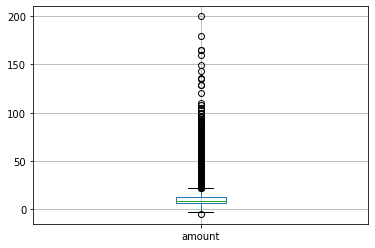

In [14]:
tf.boxplot(column="amount")
plt.show()

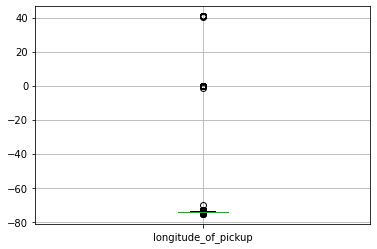

In [15]:
tf.boxplot(column="longitude_of_pickup")
plt.show()

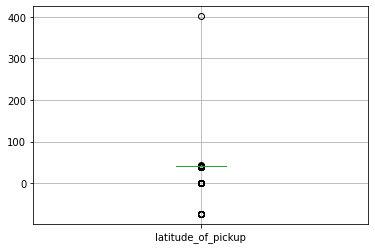

In [16]:
tf.boxplot(column="latitude_of_pickup")
plt.show()

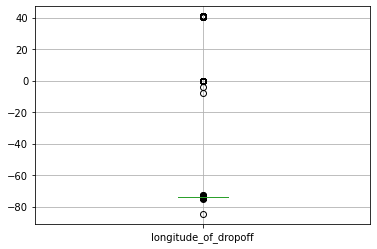

In [17]:
tf.boxplot(column="longitude_of_dropoff")
plt.show()

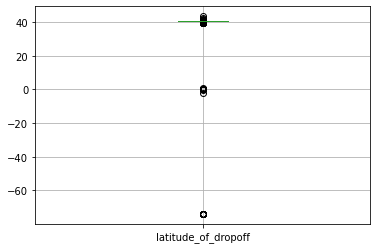

In [18]:
tf.boxplot(column="latitude_of_dropoff")
plt.show()

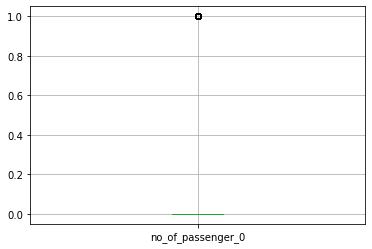

In [19]:
tf.boxplot(column="no_of_passenger_0")
plt.show()

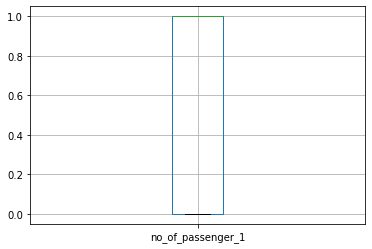

In [20]:
tf.boxplot(column="no_of_passenger_1")
plt.show()

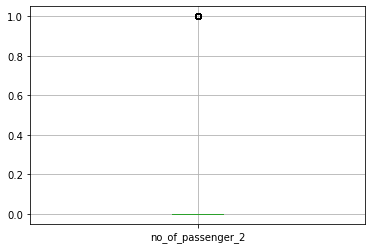

In [21]:
tf.boxplot(column="no_of_passenger_2")
plt.show()

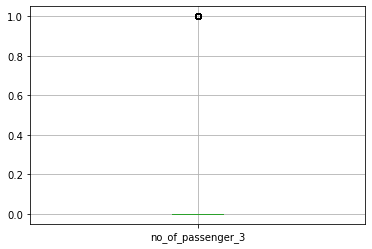

In [22]:
tf.boxplot(column="no_of_passenger_3")
plt.show()

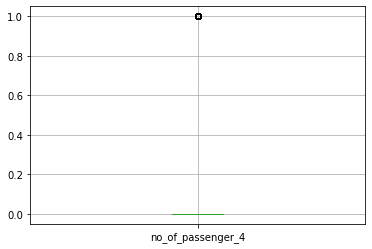

In [23]:
tf.boxplot(column="no_of_passenger_4")
plt.show()

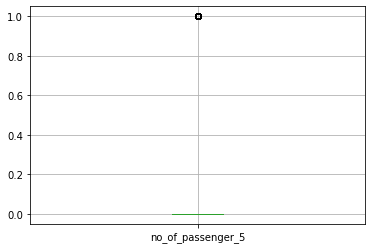

In [24]:
tf.boxplot(column="no_of_passenger_5")
plt.show()

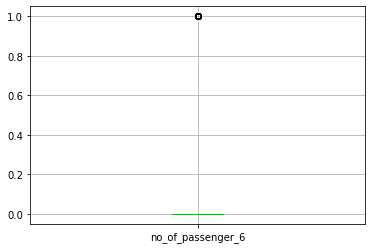

In [25]:
tf.boxplot(column="no_of_passenger_6")
plt.show()

In [26]:
def rem_out(c):
    sorted(c)
    q1,q3=c.quantile([0.25,0.75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur

In [27]:
l,u=rem_out(tf['amount'])
tf['amount']=np.where(tf['amount']>u,u,tf['amount'])
tf['amount']=np.where(tf['amount']<l,l,tf['amount'])

In [28]:
l,u=rem_out(tf['longitude_of_dropoff'])
tf['longitude_of_dropoff']=np.where(tf['longitude_of_dropoff']>u,u,tf['longitude_of_dropoff'])
tf['longitude_of_dropoff']=np.where(tf['longitude_of_dropoff']<l,l,tf['longitude_of_dropoff'])

In [29]:
l,u=rem_out(tf['latitude_of_pickup'])
tf['latitude_of_pickup']=np.where(tf['latitude_of_pickup']>u,u,tf['latitude_of_pickup'])
tf['latitude_of_pickup']=np.where(tf['latitude_of_pickup']<l,l,tf['latitude_of_pickup'])

In [30]:
l,u=rem_out(tf['longitude_of_pickup'])
tf['longitude_of_pickup']=np.where(tf['longitude_of_pickup']>u,u,tf['longitude_of_pickup'])
tf['longitude_of_pickup']=np.where(tf['longitude_of_pickup']<l,l,tf['longitude_of_pickup'])

In [31]:
l,u=rem_out(tf['latitude_of_dropoff'])
tf['latitude_of_dropoff']=np.where(tf['latitude_of_dropoff']>u,u,tf['latitude_of_dropoff'])
tf['latitude_of_dropoff']=np.where(tf['latitude_of_dropoff']<l,l,tf['latitude_of_dropoff'])

In [32]:
l,u=rem_out(tf['no_of_passenger_0'])
tf['no_of_passenger_0']=np.where(tf['no_of_passenger_0']>u,u,tf['no_of_passenger_0'])
tf['no_of_passenger_0']=np.where(tf['no_of_passenger_0']<l,l,tf['no_of_passenger_0'])

In [33]:
l,u=rem_out(tf['no_of_passenger_1'])
tf['no_of_passenger_1']=np.where(tf['no_of_passenger_1']>u,u,tf['no_of_passenger_1'])
tf['no_of_passenger_1']=np.where(tf['no_of_passenger_1']<l,l,tf['no_of_passenger_1'])

In [34]:
l,u=rem_out(tf['no_of_passenger_2'])
tf['no_of_passenger_2']=np.where(tf['no_of_passenger_2']>u,u,tf['no_of_passenger_2'])
tf['no_of_passenger_2']=np.where(tf['no_of_passenger_2']<l,l,tf['no_of_passenger_2'])

In [35]:
l,u=rem_out(tf['no_of_passenger_3'])
tf['no_of_passenger_3']=np.where(tf['no_of_passenger_3']>u,u,tf['no_of_passenger_3'])
tf['no_of_passenger_3']=np.where(tf['no_of_passenger_3']<l,l,tf['no_of_passenger_3'])

In [36]:
l,u=rem_out(tf['no_of_passenger_4'])
tf['no_of_passenger_4']=np.where(tf['no_of_passenger_4']>u,u,tf['no_of_passenger_4'])
tf['no_of_passenger_4']=np.where(tf['no_of_passenger_4']<l,l,tf['no_of_passenger_4'])

In [37]:
l,u=rem_out(tf['no_of_passenger_5'])
tf['no_of_passenger_5']=np.where(tf['no_of_passenger_5']>u,u,tf['no_of_passenger_5'])
tf['no_of_passenger_5']=np.where(tf['no_of_passenger_5']<l,l,tf['no_of_passenger_5'])

In [38]:
l,u=rem_out(tf['no_of_passenger_6'])
tf['no_of_passenger_6']=np.where(tf['no_of_passenger_6']>u,u,tf['no_of_passenger_6'])
tf['no_of_passenger_6']=np.where(tf['no_of_passenger_6']<l,l,tf['no_of_passenger_6'])

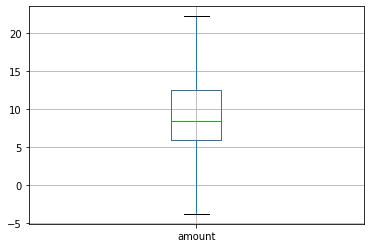

In [39]:
tf.boxplot(column="amount")
plt.show()

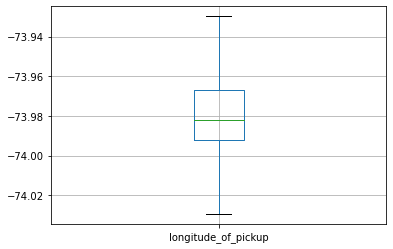

In [40]:
tf.boxplot(column="longitude_of_pickup")
plt.show()

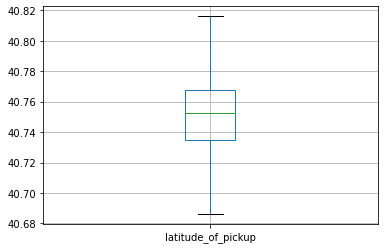

In [41]:
tf.boxplot(column="latitude_of_pickup")
plt.show()

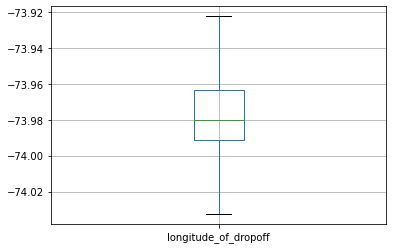

In [42]:
tf.boxplot(column="longitude_of_dropoff")
plt.show()

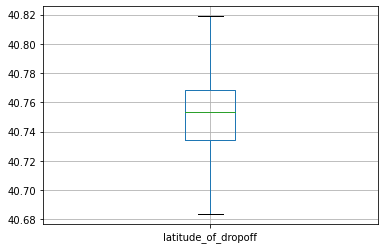

In [43]:
tf.boxplot(column="latitude_of_dropoff")
plt.show()

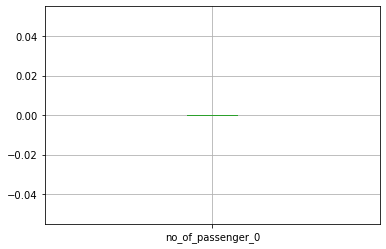

In [44]:
tf.boxplot(column="no_of_passenger_0")
plt.show()

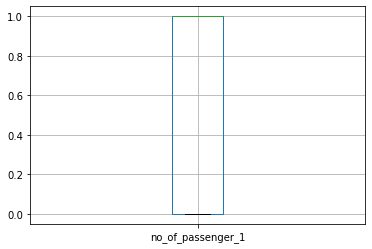

In [45]:
tf.boxplot(column="no_of_passenger_1")
plt.show()

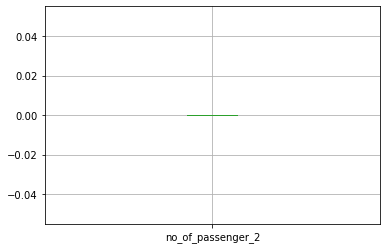

In [46]:
tf.boxplot(column="no_of_passenger_2")
plt.show()

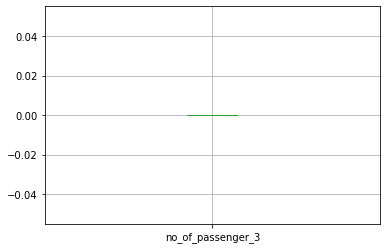

In [47]:
tf.boxplot(column="no_of_passenger_3")
plt.show()

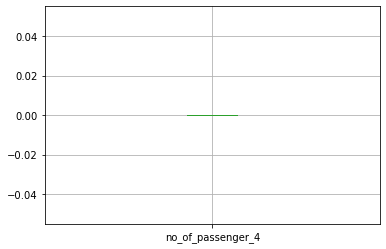

In [48]:
tf.boxplot(column="no_of_passenger_4")
plt.show()

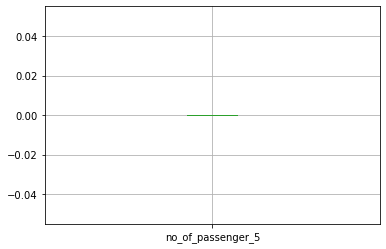

In [49]:
tf.boxplot(column="no_of_passenger_5")
plt.show()

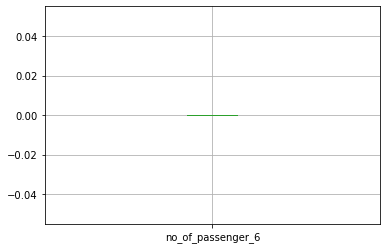

In [50]:
tf.boxplot(column="no_of_passenger_6")
plt.show()

In [51]:
# sns.pairplot(tf,diag_kind="kde")

In [52]:
dup=tf.duplicated()
dup.sum()

930

In [53]:
tf.drop_duplicates(inplace=True)

In [54]:
dup=tf.duplicated()
dup.sum()

0

In [55]:
tf.corr()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger_0,no_of_passenger_1,no_of_passenger_2,no_of_passenger_3,no_of_passenger_4,no_of_passenger_5,no_of_passenger_6
amount,1.000000,0.152914,-0.117681,0.236080,-0.125036,NaN,-0.022629,NaN,NaN,NaN,NaN,NaN
longitude_of_pickup,0.152914,1.000000,0.423854,0.352200,0.193125,NaN,0.006831,NaN,NaN,NaN,NaN,NaN
latitude_of_pickup,-0.117681,0.423854,1.000000,0.176093,0.456619,NaN,0.013792,NaN,NaN,NaN,NaN,NaN
longitude_of_dropoff,0.236080,0.352200,0.176093,1.000000,0.387670,NaN,0.004661,NaN,NaN,NaN,NaN,NaN
latitude_of_dropoff,-0.125036,0.193125,0.456619,0.387670,1.000000,NaN,0.008050,NaN,NaN,NaN,NaN,NaN
no_of_passenger_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_passenger_1,-0.022629,0.006831,0.013792,0.004661,0.008050,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
no_of_passenger_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_passenger_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_passenger_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
x=tf.drop("amount",axis=1)
y=tf[["amount"]]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [58]:
project_model1=LinearRegression()

In [59]:
project_model1.fit(x_train,y_train)

LinearRegression()

In [60]:
project_model1.score(x_train,y_train)

0.1341393313229472

In [61]:
project_model1.score(x_test,y_test)

0.1282260853983952

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
project_model2=DecisionTreeRegressor(max_depth=20,max_leaf_nodes=70,min_samples_leaf=80)

In [64]:
project_model2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=70, min_samples_leaf=80)

In [65]:
project_model2.score(x_train,y_train)

0.6789016723117733

In [66]:
project_model2.score(x_test,y_test)

0.6679201422298031

In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [68]:
project_model3=AdaBoostRegressor(n_estimators=1)

In [69]:
project_model3.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=1)

In [70]:
project_model3.score(x_train,y_train)

0.3655033959048103

In [71]:
project_model3.score(x_test,y_test)

0.34603405342511595

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

In [73]:
project_model4=GradientBoostingRegressor(n_estimators=80,max_depth=6)

In [74]:
project_model4.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=80)

In [75]:
project_model4.score(x_train,y_train)

0.8009994449608194

In [76]:
project_model4.score(x_test,y_test)

0.7582318912752312